***CHURNING CUSTOMERS IN A TELECOMS COMPANY***

**IMPORTATION OF NECCESSARY LIBRARIES AND MOUNTING OF** **DRIVE**

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np



# Machine learning libraries
import sklearn as sk
import tensorflow as tf

from tensorflow.keras import layers,models
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model


from sklearn.model_selection import GridSearchCV, StratifiedKFold,RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Additional Libraries
from google.colab import drive

In [2]:
!pip install scikeras


In [3]:
from scikeras.wrappers import KerasClassifier

In [4]:
# Mounts the Google Drive to the specified directory '/content/drive'
# This allows access to files and data stored in your Google Drive within the Colab environment
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***DATA COLLECTION***

In [5]:
# Reasa CSV file into a Pandas DataFrame
# The file 'player_21.csv' is located in the specified Google Drive directory and is loaded into the variabe 'first_dataset' for further data analysis
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv')

In [6]:
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
dataset['TotalCharges']=pd.to_numeric(dataset['TotalCharges'],errors='coerce')

In [9]:
dataset.TotalCharges.isna().sum()

11

In [10]:
dataset.dropna(subset=['TotalCharges'],inplace=True)


In [11]:
dataset.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
dataset.reset_index(drop=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**EXPLORATORY DATA ANALYSIS AND DATA PREPROCESSING**

In [14]:
# Access and display the column labels (column names) of Pandas DataFrame
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
# Select columns with numeric data types
num1=dataset.select_dtypes(include=['number'])

# Select columns with non-numeric
obj1=dataset.select_dtypes(exclude=['number'])

In [16]:

num1.isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [17]:
# This includes statistics like count, mean, standard deviation, minimum, and quartiles for each numeric columns
num1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
obj1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7032 non-null   object
 1   gender            7032 non-null   object
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   PhoneService      7032 non-null   object
 5   MultipleLines     7032 non-null   object
 6   InternetService   7032 non-null   object
 7   OnlineSecurity    7032 non-null   object
 8   OnlineBackup      7032 non-null   object
 9   DeviceProtection  7032 non-null   object
 10  TechSupport       7032 non-null   object
 11  StreamingTV       7032 non-null   object
 12  StreamingMovies   7032 non-null   object
 13  Contract          7032 non-null   object
 14  PaperlessBilling  7032 non-null   object
 15  PaymentMethod     7032 non-null   object
 16  Churn             7032 non-null   object
dtypes: object(17)


In [19]:
obj1.isnull().any()

customerID          False
gender              False
Partner             False
Dependents          False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
Churn               False
dtype: bool

In [20]:
print(obj1.columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [21]:
# Import necessary preprocessing tools from scikit-learn
from sklearn.preprocessing import LabelEncoder,StandardScaler

#List of column names to be encoded
columns=['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn']

# Create a dictonary to store LabelEncoder instances for each colmun
dict_obj = {}

# Iterate through the list of columns and apply LabelEncoder to each
for col in columns:
  obj=LabelEncoder()
  obj1[col]=obj.fit_transform(obj1[col])
dict_obj[col]=obj


In [22]:
obj1

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,5365,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,3953,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2558,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,5524,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,6500,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4843,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,1524,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,3358,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,5923,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [23]:
obj1.isnull().sum()



customerID          0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

In [24]:
# The resulting DataFrame contains both encoded categorical and imputed numeric data
new_dataset= pd.concat([obj1,num1],axis=1)

In [25]:
print(new_dataset.columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn',
       'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


***Feature Selection and Engineering***

In [26]:
#exploring possible corelatons of features with churn
#Extract target variable
target=new_dataset['Churn']
features=new_dataset.drop('Churn',axis=1)

corr_with_target = features.corrwith(target)
corr_with_target= corr_with_target.sort_values(ascending=False)


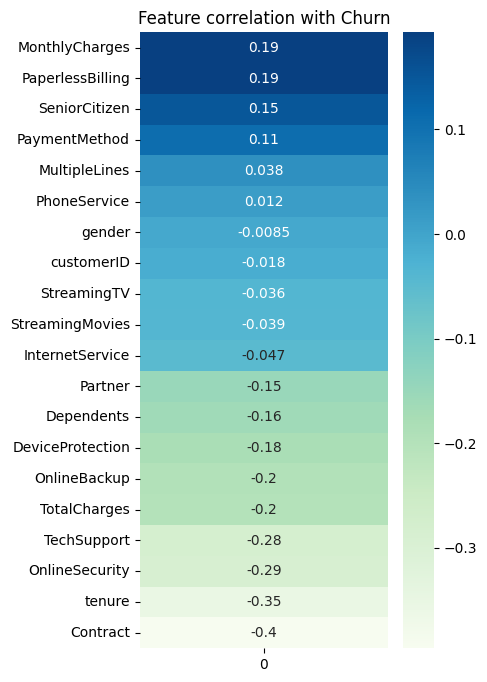

In [27]:
#visualising on heat map
plt.figure(figsize=(4,8))
sns.heatmap(corr_with_target.to_frame(),cmap='GnBu',annot=True)
plt.title('Feature correlation with Churn')
plt.show()

In [28]:
RandomForestClassifier,
#Feature importance to select features
rf=RandomForestClassifier()
rf.fit(features,target)
importances= rf.feature_importances_

In [29]:
feature_importance_df=pd.DataFrame({'Features':features.columns,'Score':importances})
feature_importance_df=feature_importance_df.sort_values(by='Score',ascending=False)
print(feature_importance_df)

            Features     Score
19      TotalCharges  0.157031
18    MonthlyCharges  0.146771
17            tenure  0.142259
0         customerID  0.130577
13          Contract  0.076125
15     PaymentMethod  0.041479
7     OnlineSecurity  0.040390
10       TechSupport  0.037379
6    InternetService  0.028672
8       OnlineBackup  0.024208
1             gender  0.023389
14  PaperlessBilling  0.022524
9   DeviceProtection  0.022002
5      MultipleLines  0.019885
2            Partner  0.019326
16     SeniorCitizen  0.017663
3         Dependents  0.016522
12   StreamingMovies  0.014766
11       StreamingTV  0.014308
4       PhoneService  0.004726


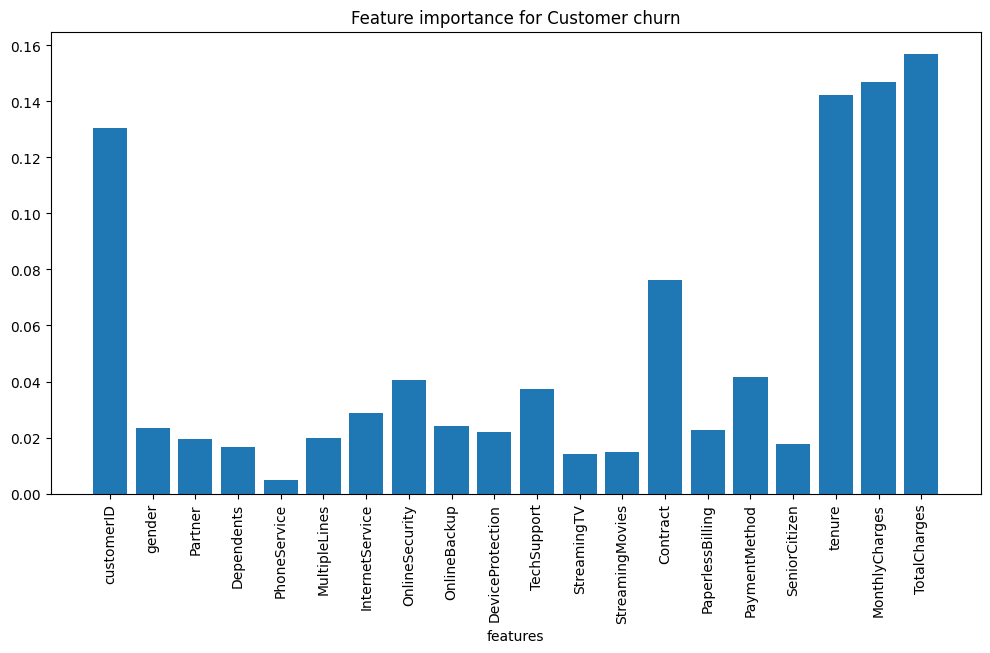

In [30]:
#Visualising feature importances in relation to churn
plt.figure(figsize=(12,6))
plt.bar(range(features.shape[1]),importances)
plt.xticks(range(features.shape[1]),features.columns,rotation=90)
plt.ylabel=('Feature importance scores')
plt.xlabel('features')
plt.title('Feature importance for Customer churn')
plt.show()

In [31]:
#selecting the first 5 features and the target variable
best_features_with_target= ['customerID','TotalCharges','MonthlyCharges','tenure','Contract','Churn']
chosen_features=new_dataset[best_features_with_target]

In [32]:

chosen_features

,customerID,TotalCharges,MonthlyCharges,tenure,Contract,Churn
0,5365,29.85,29.85,1,0,0
1,3953,1889.50,56.95,34,1,0
2,2558,108.15,53.85,2,0,1
3,5524,1840.75,42.30,45,1,0
4,6500,151.65,70.70,2,0,1
...,...,...,...,...,...,...
7038,4843,1990.50,84.80,24,1,0
7039,1524,7362.90,103.20,72,1,0
7040,3358,346.45,29.60,11,0,0
7041,5923,306.60,74.40,4,0,1


Analysis of Customer profile relation to Churn


In [33]:
#from dataset exploration, we can see the customer profiles are Senior Citizen,Gender,Partner,and Dependents
#we will examine churn in relation to these profiles

In [34]:
#Function to analyse yes/no variables

def churn_variance_distribution(col_name):
  churn_negative = ((dataset[dataset['Churn']=='No'][col_name].value_counts()))/(
  dataset[dataset['Churn']=='No'][col_name].value_counts().sum())

  churn_positive = ((dataset[dataset['Churn']=='Yes'][col_name].value_counts()))/(
  dataset[dataset['Churn']=='Yes'][col_name].value_counts().sum())


  x_labels = dataset['Churn'].value_counts().keys().tolist()
  negative_variance = [churn_negative['No'],churn_positive['No']]
  positive_variance = [churn_negative['Yes'],churn_positive['Yes']]

  barWidth = 0.8
  plt.figure(figsize=(7,7))
  ax1 = plt.bar(x_labels, negative_variance, color='#00BFFF',
                  label=('No ' + col_name), edgecolor='white', width=barWidth)
  ax2 = plt.bar(x_labels, positive_variance, bottom=negative_variance, color='lightgreen',
                  label=('Yes ' + col_name), edgecolor='white', width=barWidth)
  plt.legend()
  plt.title('Churn Distribution by ' + col_name)

  for r1, r2 in zip(ax1, ax2):
      h1=r1.get_height()
      h2 = r2.get_height()
      plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '{:.2%}'.format(h1),
              ha='center', va='center', color='black', fontweight='bold')
      plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '{:.2%}'.format(h2),
              ha='center', va='center', color='black', fontweight='bold')

  plt.show()






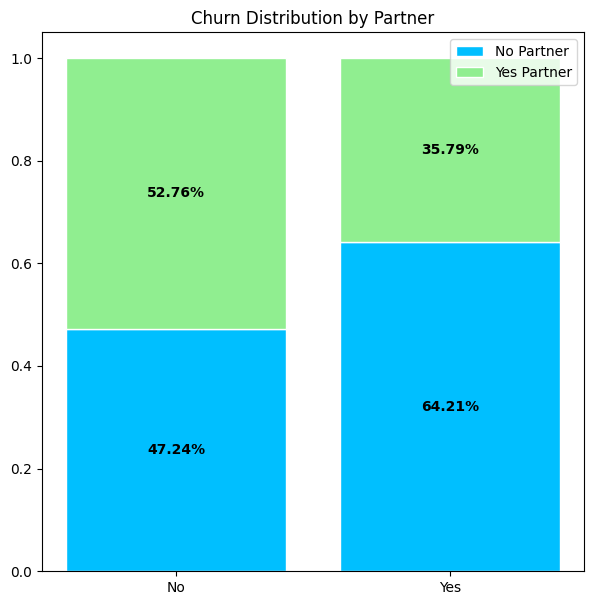

In [35]:
churn_variance_distribution('Partner')

From this we can see that customers without partners are more related to the churn and churn more than customers with partners

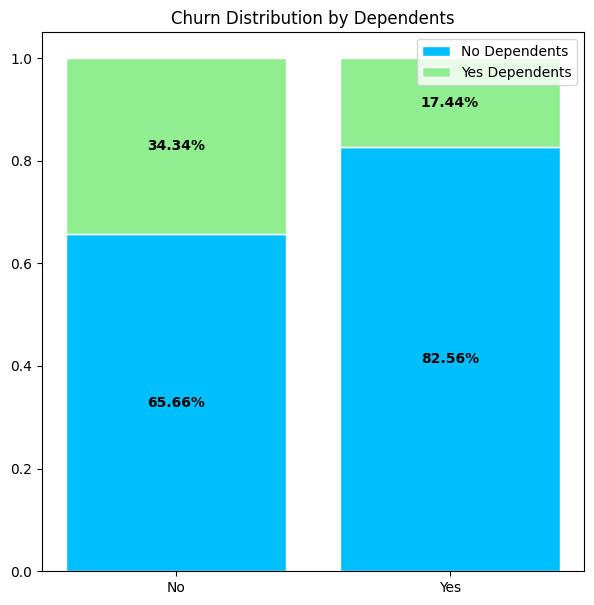

In [36]:
churn_variance_distribution('Dependents')

This means that customers without dependents churn a lot more, with a percentage of 82.56%

In [37]:
churn_numeric = {'Yes':1, 'No':0}
dataset.Churn.replace(churn_numeric, inplace=True)

In [38]:
#analysis for categorical values where category is not yes or no

In [39]:
dataset[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236503
1,0.416813


Senior Citizens churn a lot more that non-Senior Citizens

In [40]:
dataset[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269595
Male,0.262046


2. Answer: This means that Senior citizen females who have no partners and no dependents have the most churn

Females churn more than males, although the difference is very slight

*Data Scaling and Splitting*


In [41]:
# Remove the 'overall' column from the DataFrame 'features'to create the feature matrix 'X'
X = chosen_features.drop("Churn",axis=1)

# Extract the 'overall'colum as the target variable 'y'
y = chosen_features["Churn"]

# Create a StandardScaler instance to standardize the feature matrx 'X'
scaler = StandardScaler()

# Standardize the feature matrix 'X'
X_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
X_train

,customerID,TotalCharges,MonthlyCharges,tenure,Contract
6030,1365,2076.20,49.05,43,0
3410,3462,188.70,53.40,3,0
5483,3923,4458.15,77.75,55,0
5524,1165,2553.70,54.65,45,2
6337,1857,5448.60,100.90,55,1
...,...,...,...,...,...
3778,6775,137.25,50.40,3,0
5199,5140,5703.25,111.50,51,1
5235,2997,784.45,81.15,9,0
5399,1770,989.05,19.75,50,1


In [43]:
X_test

,customerID,TotalCharges,MonthlyCharges,tenure,Contract
2481,4678,1501.75,25.00,61,2
6784,6710,465.85,24.70,19,0
6125,594,1359.00,102.25,13,0
3052,3634,2030.75,55.05,37,0
4099,4689,161.45,29.45,6,0
...,...,...,...,...,...
1733,686,19.05,19.05,1,0
5250,2326,1173.55,94.55,12,0
5465,4917,1553.20,56.05,26,1
5851,2884,3836.30,110.80,35,1


***Building and   Training Multilayer Perceptron Using Functional API***

In [44]:
def model_creation(optimizer='adam', activation='relu'):
    input_layer = Input(shape=(X_train.shape[1],))
    hiddenlayer1 = Dense(128, activation='relu')(input_layer)
    hiddenlayer2 = Dense(64, activation='tanh')(hiddenlayer1)
    hiddenlayer3 = Dense(32, activation='elu')(hiddenlayer2)
    hiddenlayer4 = Dense(8, activation='selu')(hiddenlayer3)
    hiddenlayer5 = Dense(8, activation='softmax')(hiddenlayer4)
    output_layer = Dense(1, activation='sigmoid')(hiddenlayer5)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [45]:
model = KerasClassifier(build_fn=model_creation, epochs=10, activation='relu',batch_size=32, verbose=0)


In [46]:
param_grid = {'batch_size': [10, 15,20],
         'epochs': [10,15],
         'optimizer': ['adam', 'rmsprop'],
         'loss': ['binary_crossentropy', 'hinge'],

         'activation': ['relu', 'tanh','softmax','sigmoid'],
         }

In [47]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter distributions for RandomizedSearchCV
param_dist = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh', 'sigmoid']
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='roc_auc', cv=kfold, n_iter=10)
random_result = random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_random_model = random_result.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wra

Training And retesting optimised Model

In [53]:

y_pred_random = best_random_model.predict(X_test)
random_accuracy = accuracy_score(y_test, y_pred_random)
random_auc = roc_auc_score(y_test, y_pred_random)

print(f'Randomized Search Accuracy: {random_accuracy}')
print(f'Randomized Search AUC: {random_auc}')

Randomized Search Accuracy: 0.736318407960199
Randomized Search AUC: 0.5040106951871658


Saving the model

In [55]:
import pickle
finalfile=open('trained_model.pkl','wb')
pickle.dump(best_random_model,finalfile)